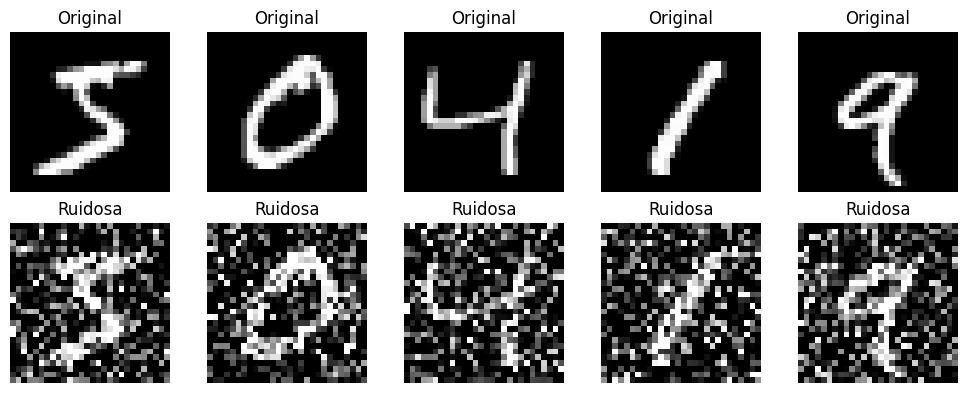

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.3359 - val_loss: 0.2052
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1962 - val_loss: 0.1726
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.1692 - val_loss: 0.1594
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1581 - val_loss: 0.1529
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1521 - val_loss: 0.1484
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1480 - val_loss: 0.1454
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1449 - val_loss: 0.1429
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1416 - val_loss: 0.1397
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1387 - val_loss: 0.1370
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1361 - val_loss: 0.1349
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


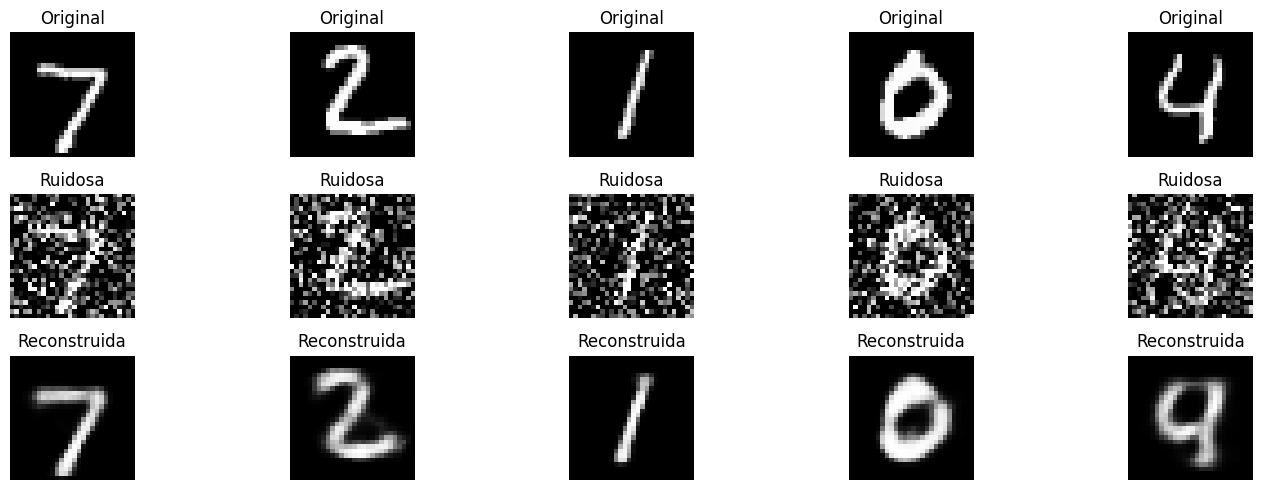

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los datos al rango [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Añadir ruido gaussiano a las imágenes
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Asegurarse de que los valores estén en el rango [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Mostrar imágenes originales y ruidosas
plt.figure(figsize=(10, 4))
for i in range(5):
    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.title("Original")

    # Imagen con ruido
    plt.subplot(2, 5, i + 6)
    plt.imshow(x_train_noisy[i], cmap="gray")
    plt.axis("off")
    plt.title("Ruidosa")
plt.tight_layout()
plt.show()

# Redimensionar las imágenes para el autoencoder
x_train = np.expand_dims(x_train, -1)  # (28, 28, 1)
x_test = np.expand_dims(x_test, -1)    # (28, 28, 1)
x_train_noisy = np.expand_dims(x_train_noisy, -1)  # (28, 28, 1)
x_test_noisy = np.expand_dims(x_test_noisy, -1)    # (28, 28, 1)

# Construcción del Autoencoder
input_img = Input(shape=(28, 28, 1))

# Codificador (Encoder)
x = Flatten()(input_img)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
encoded = Dense(32, activation="relu")(x)

# Decodificador (Decoder)
x = Dense(64, activation="relu")(encoded)
x = Dense(128, activation="relu")(x)
x = Dense(28 * 28, activation="sigmoid")(x)
decoded = Reshape((28, 28, 1))(x)

# Modelo completo (Autoencoder)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Entrenamiento del Autoencoder
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Reconstrucción de imágenes con el autoencoder entrenado
decoded_images = autoencoder.predict(x_test_noisy)

# Mostrar resultados: imágenes originales, ruidosas y reconstruidas
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # Imagen original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title("Original")

    # Imagen ruidosa
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title("Ruidosa")

    # Imagen reconstruida
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title("Reconstruida")
plt.tight_layout()
plt.show()

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"clemenes","key":"95254bbe4dbaa0ec04445fae6e191152"}'}

In [9]:
# Crear la carpeta .kaggle si no existe
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json a la carpeta .kaggle
!mv kaggle.json ~/.kaggle/

# Cambiar los permisos para que el archivo no sea público
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                          1MB  2025-01-03 10:33:01           4842        142  1.0              
ashaychoudhary/comprehensive-lung-cancer-dataset                 Comprehensive Lung Cancer Dataset                   10MB  2025-01-16 04:28:26            769         25  1.0              
ruchikakumbhar/obesity-prediction                                Obesity Prediction Dataset                          58KB  2025-01-14 05:31:18           1558         31  1.0              
ashaychoudhary/social-media-and-entertainment-dataset       

In [28]:
# Descargar el dataset desde Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/  # Asegúrate de haber subido tu archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset

# Descomprimir el archivo descargado
!unzip celeba-dataset.zip -d /content/celebaA

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: /content/celeba/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: /content/celeb

In [31]:
!ls /content

celeba	celeba-dataset.zip  sample_data


In [32]:
!ls /content/celeba

img_align_celeba      list_bbox_celeba.csv     list_landmarks_align_celeba.csv
list_attr_celeba.csv  list_eval_partition.csv


In [34]:
!ls /content/celeba/img_align_celeba/img_align_celeba

Se han truncado las últimas 5000 líneas del flujo de salida.
020326.jpg  045651.jpg	070976.jpg  096301.jpg	121626.jpg  146951.jpg	172276.jpg  197601.jpg
020327.jpg  045652.jpg	070977.jpg  096302.jpg	121627.jpg  146952.jpg	172277.jpg  197602.jpg
020328.jpg  045653.jpg	070978.jpg  096303.jpg	121628.jpg  146953.jpg	172278.jpg  197603.jpg
020329.jpg  045654.jpg	070979.jpg  096304.jpg	121629.jpg  146954.jpg	172279.jpg  197604.jpg
020330.jpg  045655.jpg	070980.jpg  096305.jpg	121630.jpg  146955.jpg	172280.jpg  197605.jpg
020331.jpg  045656.jpg	070981.jpg  096306.jpg	121631.jpg  146956.jpg	172281.jpg  197606.jpg
020332.jpg  045657.jpg	070982.jpg  096307.jpg	121632.jpg  146957.jpg	172282.jpg  197607.jpg
020333.jpg  045658.jpg	070983.jpg  096308.jpg	121633.jpg  146958.jpg	172283.jpg  197608.jpg
020334.jpg  045659.jpg	070984.jpg  096309.jpg	121634.jpg  146959.jpg	172284.jpg  197609.jpg
020335.jpg  045660.jpg	070985.jpg  096310.jpg	121635.jpg  146960.jpg	172285.jpg  197610.jpg
020336.jpg  045661.

In [35]:
import os
import numpy as np
from PIL import Image

# Ruta a las imágenes
img_dir = "/content/celeba/img_align_celeba/img_align_celeba"

# Tamaño de las imágenes redimensionadas
image_size = (64, 64)

# Leer y procesar imágenes
images = []
for i, file in enumerate(os.listdir(img_dir)):
    file_path = os.path.join(img_dir, file)
    if os.path.isfile(file_path):  # Verifica que sea un archivo
        if i >= 5000:  # Limita a 5000 imágenes para pruebas
            break
        try:
            img = Image.open(file_path).resize(image_size)
            images.append(np.array(img) / 255.0)  # Normaliza al rango [0, 1]
        except Exception as e:
            print(f"Error procesando la imagen {file}: {e}")

# Convertir la lista de imágenes a un array NumPy
x_train = np.array(images)
print(f"Total imágenes cargadas: {x_train.shape[0]}")

Total imágenes cargadas: 5000


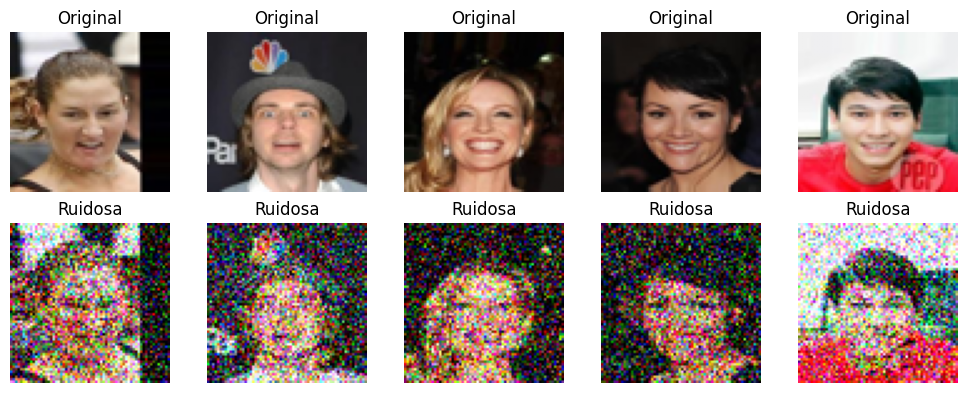

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - loss: 0.6150
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - loss: 0.5103
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - loss: 0.5040
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - loss: 0.5017
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - loss: 0.5013
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - loss: 0.4991
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - loss: 0.4989
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - loss: 0.4973
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - loss: 0.4969
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - loss: 0.4976


In [36]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Añadir ruido a las imágenes
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)

# Mostrar imágenes originales y ruidosas
plt.figure(figsize=(10, 4))
for i in range(5):
    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("Original")

    # Imagen con ruido
    plt.subplot(2, 5, i + 6)
    plt.imshow(x_train_noisy[i])
    plt.axis("off")
    plt.title("Ruidosa")
plt.tight_layout()
plt.show()

# Construcción del Autoencoder
input_img = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
encoded = Conv2D(16, (3, 3), activation="relu", padding="same")(x)

# Decoder
x = Conv2D(16, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Modelo completo
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Entrenar el autoencoder
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=64,
    shuffle=True
)

157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step


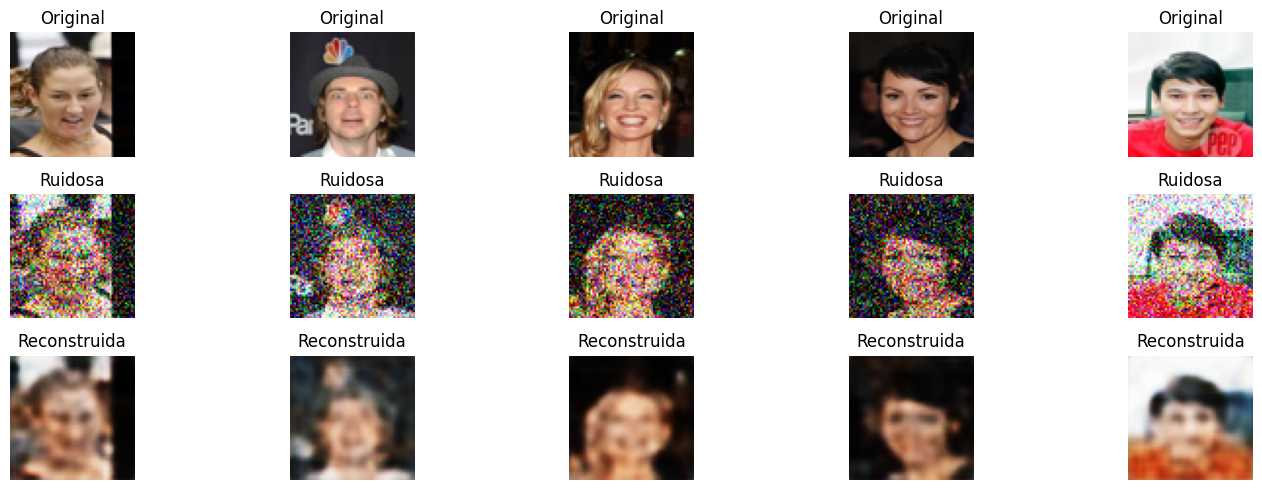

In [37]:
# Reconstruir imágenes con el autoencoder entrenado
decoded_images = autoencoder.predict(x_train_noisy)

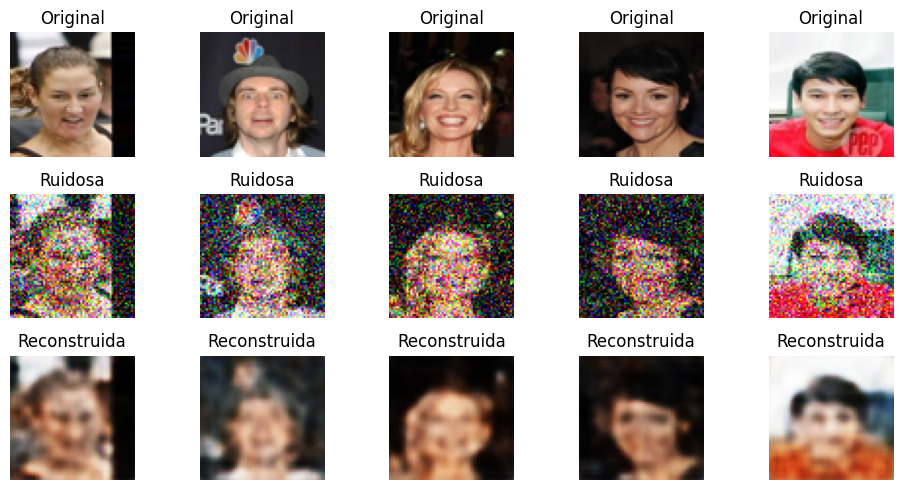

In [39]:
# Visualizar imágenes originales, ruidosas y reconstruidas
n = 5
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura
for i in range(n):
    # Imagen original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("Original")

    # Imagen ruidosa
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i])
    plt.axis("off")
    plt.title("Ruidosa")

    # Imagen reconstruida
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i])
    plt.axis("off")
    plt.title("Reconstruida")

plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Reduce el espacio horizontal y ajusta el vertical
plt.tight_layout()
plt.show()